### Import

In [19]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import multivariate_normal
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

### Fonts

In [20]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Read Colormap

In [21]:
cmap = Image.open('../../assets/colormaps/green_yellow_orange_red_muted.png')
colormap = np.array(cmap)[100,:,:]

### Create Data

In [22]:
npoints = 200
X1 = multivariate_normal.rvs(mean=[+8,+8], cov=np.eye(2),size=int(npoints/2));
X2 = multivariate_normal.rvs(mean=[-8,-8], cov=np.eye(2),size=int(npoints/2));
X3 = multivariate_normal.rvs(mean=[-8,+8], cov=np.eye(2),size=int(npoints/2));
X4 = multivariate_normal.rvs(mean=[+8,-8], cov=np.eye(2),size=int(npoints/2));
X1c = X1.copy()
X2c = X2.copy()
X3c = X3.copy()
X4c = X4.copy()
X1c[:,1] = X1c[:,1] - 16
X1c[:,0] = X1c[:,0] - 16
X3c[:,0] = X3c[:,0] + 16
X4c[:,1] = X4c[:,1] +  16
Xs = np.vstack((X4,X2,X3,X1))
Xn = np.vstack((X1,X2,X3,X4))
Xc = np.vstack((X1c,X2c,X3c,X4c))
y = np.vstack((np.zeros((npoints,1)),np.ones((npoints,1))))[:,0]

### Meshgrid to visualize the boundaries

In [23]:
vx,vy = np.meshgrid(np.linspace(-15,15,150),np.linspace(-15,15,150))
xx = vx.flatten()
yy = vy.flatten()
MX = np.vstack((xx,yy)).T

### Divide the data

In [24]:
class0_ind = np.where(y == 0)[0]
class1_ind = np.where(y == 1)[0]

### Divide Training and Testing Data

In [25]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size=0.20, random_state=42)
Xns_train, Xns_test, yns_train, yns_test = train_test_split(Xn, y, test_size=0.20, random_state=42)

### Create Multilayer Perceptron

In [35]:
perceptron_sep = Perceptron(max_iter=20000)
perceptron_nosep = Perceptron(max_iter=20000)

### Train on Seperable and Non-Seperable Data

In [36]:
perceptron_sep.fit(Xs_train, ys_train);
perceptron_nosep.fit(Xns_train, yns_train);
print(perceptron_sep.score(Xs_test,ys_test))
print(perceptron_nosep.score(Xns_test,yns_test))

1.0
0.45


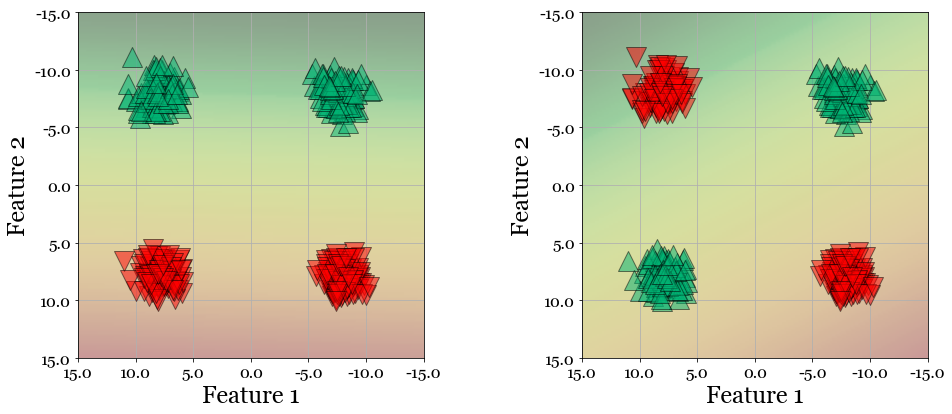

In [72]:
coef = perceptron_sep.coef_
bias = perceptron_sep.intercept_
V = -np.dot(MX,coef.T) + bias
V = V - np.min(V)
V = V / np.max(V)
V = V * 255
V = V.astype(int)
cmap = colormap[V,:]
cmap = np.reshape(cmap,((150,150,3)));

plt.figure(figsize=(12,6));
plt.subplots_adjust(left=0.0,bottom=0.1, right=1.0, top=0.9, wspace=0.4, hspace=0.5)

#Plot
ax = plt.subplot(1,2,1);
ax.set_axisbelow(True);
plt.scatter(Xs[class0_ind,0],Xs[class0_ind,1],
            s=400,marker='^',alpha=0.5,
            facecolor=(0.00,0.70,0.45),edgecolor='k');
plt.scatter(Xs[class1_ind,0],Xs[class1_ind,1],
            s=400,marker='v',alpha=0.5,
            facecolor=(1.00,0.00,0.00),edgecolor='k');
plt.imshow(cmap,extent=(15,-15,15,-15));
plt.xticks(np.linspace(-15,15,7),np.linspace(-15,15,7),**csfont,fontsize=16);
plt.yticks(np.linspace(-15,15,7),np.linspace(-15,15,7),**csfont,fontsize=16);
plt.xlabel('Feature 1',**csfont,fontsize=24)
plt.ylabel('Feature 2',**csfont,fontsize=24)
plt.grid();

coef = perceptron_nosep.coef_
bias = perceptron_nosep.intercept_
V = -np.dot(MX,coef.T) + bias
V = V - np.min(V)
V = V / np.max(V)
V = V * 255
V = V.astype(int)
cmap = colormap[V,:]
cmap = np.reshape(cmap,((150,150,3)));

#Plot
ax = plt.subplot(1,2,2);
ax.set_axisbelow(True);
plt.scatter(Xn[class0_ind,0],Xn[class0_ind,1],s=400,
            marker='^',alpha=0.5,
            facecolor=(0.00,0.70,0.45),edgecolor='k');
plt.scatter(Xn[class1_ind,0],Xn[class1_ind,1],s=400,
            marker='v',alpha=0.5,
            facecolor=(1.00,0.00,0.00),edgecolor='k');
plt.imshow(cmap,extent=(15,-15,15,-15));
plt.xticks(np.linspace(-15,15,7),np.linspace(-15,15,7),**csfont,fontsize=16);
plt.yticks(np.linspace(-15,15,7),np.linspace(-15,15,7),**csfont,fontsize=16);
plt.xlabel('Feature 1',**csfont,fontsize=24)
plt.ylabel('Feature 2',**csfont,fontsize=24)
plt.grid();
plt.savefig('../../assets/matplotlib/024_perceptron.png', dpi=300,bbox_inches="tight")